# Etude  Virus Corona

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_html('https://www.worldometers.info/coronavirus/#countries')[0]


In [4]:
new_cols = df.columns.values
new_cols[0] = 'Countries'
df.columns = new_cols

df

,Countries,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80790,+36,3158.0,22.0,61611.0,16021,4492.0,56.1
1,Italy,12462,"+2,313",827.0,196.0,1045.0,10590,1028.0,206.1
2,Iran,9000,+958,354.0,63.0,2959.0,5687,NaN,107.2
3,S. Korea,7755,+242,60.0,NaN,288.0,7407,54.0,151.3
4,France,2281,+497,48.0,15.0,12.0,2221,105.0,34.9
5,Spain,2262,+567,54.0,18.0,183.0,2025,101.0,48.4
6,Germany,1908,+343,3.0,1.0,25.0,1880,9.0,22.8
7,USA,1238,+244,36.0,6.0,15.0,1187,10.0,3.7
8,Diamond Princess,696,NaN,7.0,NaN,325.0,364,32.0,NaN
9,Switzerland,652,+155,4.0,1.0,4.0,644,NaN,75.3


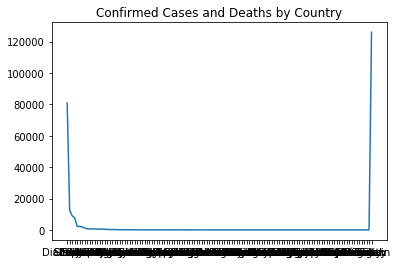

In [6]:
plt.figure()
plt.title('Confirmed Cases and Deaths by Country')
plt.plot(df.Countries, df.TotalCases)


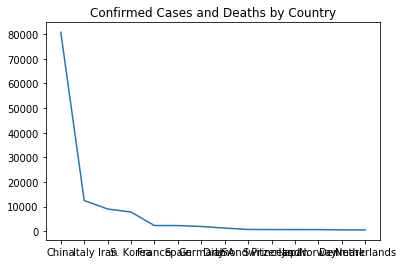

In [7]:
top50 = df['TotalCases'] > 500
nototal = df['Countries'] != 'Total:'

plt.figure()
plt.title('Confirmed Cases and Deaths by Country')
plt.plot(df[top50 & nototal].Countries, df[top50 & nototal].TotalCases)


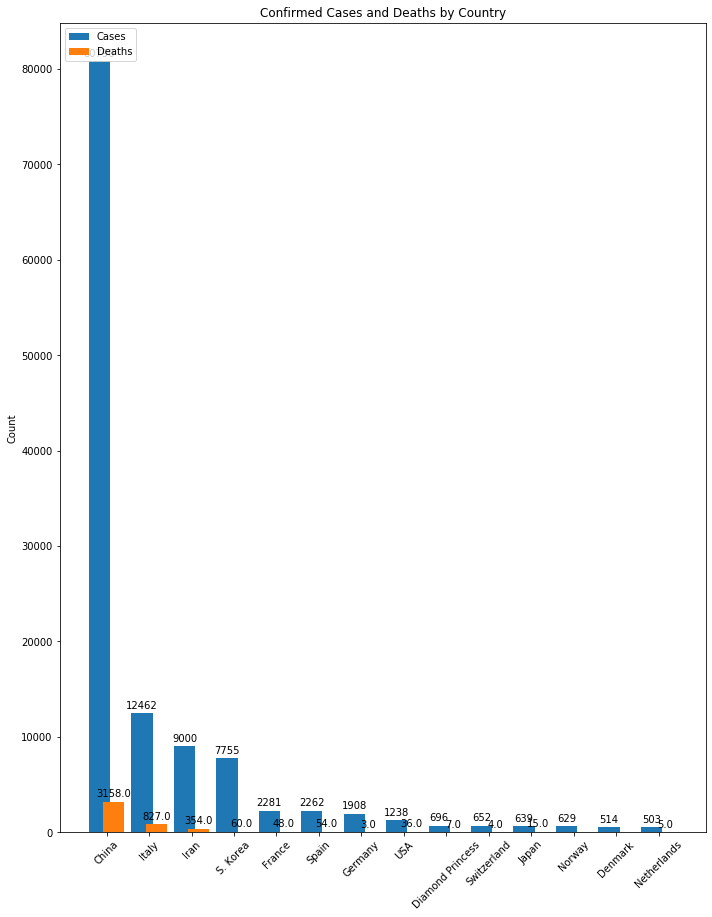

In [19]:
import numpy as np

x = np.arange(len(df[top50 & nototal].Countries))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(10,12))
rects1 = ax.bar(x - width/3, df[top50 & nototal].TotalCases, width, label='Cases')
rects2 = ax.bar(x + width/3, df[top50 & nototal].TotalDeaths, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Confirmed Cases and Deaths by Country')
ax.set_xticks(x)
ax.set_xticklabels(df[top50 & nototal].Countries)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.xticks(rotation=45)

plt.show()

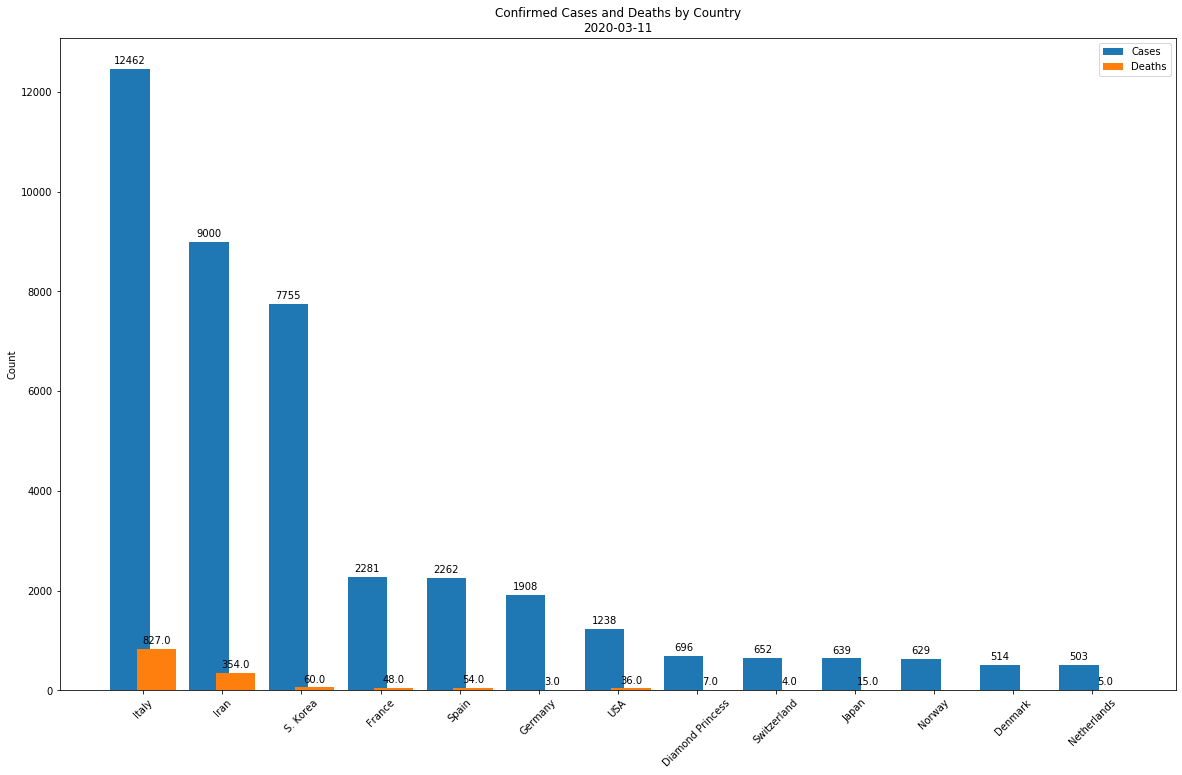

In [18]:
from datetime import date
today = date.today()

nochina = df['Countries'] != 'China'

x = np.arange(len(df[top50 & nototal & nochina].Countries))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(x - width/3, df[top50 & nototal & nochina].TotalCases, width, label='Cases')
rects2 = ax.bar(x + width/3, df[top50 & nototal & nochina].TotalDeaths, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Confirmed Cases and Deaths by Country\n{}'.format(today))
ax.set_xticks(x)
ax.set_xticklabels(df[top50 & nototal & nochina].Countries)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


plt.xticks(rotation=45)

plt.show()